In [123]:
import requests
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt

In [124]:
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart?vs_currency=usd&days=max&interval=daily"
response = requests.get(url)
data = response.json()

In [125]:
df = pd.DataFrame(data['prices'], columns=['timestamp', 'price'])
df['date'] = pd.to_datetime(df['timestamp'], unit='ms')
df.drop('timestamp', axis=1, inplace=True)

In [126]:
df.drop(df.index[-1], axis = 0, inplace=True)

In [127]:
df['progression daily']=0

In [128]:
df

,price,date,progression daily
0,135.300000,2013-04-28,0
1,141.960000,2013-04-29,0
2,135.300000,2013-04-30,0
3,117.000000,2013-05-01,0
4,103.430000,2013-05-02,0
...,...,...,...
3814,27948.103652,2023-10-09,0
3815,27593.782534,2023-10-10,0
3816,27392.247703,2023-10-11,0
3817,26842.190439,2023-10-12,0


In [129]:
#Progression daily : improvement on the previous day
for i in range(df.shape[0] - 1):
      df.loc[i+1, 'progression daily'] = (df['price'][i+1] / df['price'][i]) - 1

C:\Users\thoma\AppData\Local\Temp\ipykernel_11412\3522090179.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.04922394678492226' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i+1, 'progression daily'] = (df['price'][i+1] / df['price'][i]) - 1


In [130]:
df

,price,date,progression daily
0,135.300000,2013-04-28,0.000000
1,141.960000,2013-04-29,0.049224
2,135.300000,2013-04-30,-0.046915
3,117.000000,2013-05-01,-0.135255
4,103.430000,2013-05-02,-0.115983
...,...,...,...
3814,27948.103652,2023-10-09,-0.001052
3815,27593.782534,2023-10-10,-0.012678
3816,27392.247703,2023-10-11,-0.007304
3817,26842.190439,2023-10-12,-0.020081


In [131]:
#Progression daily : improvement on the next day (predict target)

df['progression tomorrow']=0.0
for i in range(df.shape[0] - 1):
      df.loc[i, 'progression tomorrow'] = (df['price'][i+1] / df['price'][i]) - 1

In [132]:
df

,price,date,progression daily,progression tomorrow
0,135.300000,2013-04-28,0.000000,0.049224
1,141.960000,2013-04-29,0.049224,-0.046915
2,135.300000,2013-04-30,-0.046915,-0.135255
3,117.000000,2013-05-01,-0.135255,-0.115983
4,103.430000,2013-05-02,-0.115983,-0.120081
...,...,...,...,...
3814,27948.103652,2023-10-09,-0.001052,-0.012678
3815,27593.782534,2023-10-10,-0.012678,-0.007304
3816,27392.247703,2023-10-11,-0.007304,-0.020081
3817,26842.190439,2023-10-12,-0.020081,-0.004212


In [133]:
#Fear and greed index

# URL de base
base_url = "https://api.alternative.me"

# Endpoint pour le Fear and Greed Index
endpoint = "/fng/"

# Paramètres
params = {
    "limit": "0",  # obtenir toutes les données disponibles
    "format": "json",  # format des données
    "date_format": "world"  # format de la date
}

# Faire la requête
response = requests.get(base_url + endpoint, params=params)

# Vérifier si la requête a réussi
if response.status_code == 200:
    data = response.json()["data"]
    df_fng = pd.DataFrame(data)
else:
    print(f"Erreur {response.status_code}: {response.text}")

In [134]:
df_fng.drop(df_fng.columns[-1], axis=1, inplace=True)

In [135]:
df_fng

,value,value_classification,timestamp
0,44,Fear,13-10-2023
1,45,Fear,12-10-2023
2,47,Neutral,11-10-2023
3,50,Neutral,10-10-2023
4,50,Neutral,09-10-2023
...,...,...,...
2073,11,Extreme Fear,05-02-2018
2074,24,Extreme Fear,04-02-2018
2075,40,Fear,03-02-2018
2076,15,Extreme Fear,02-02-2018


In [136]:
# Convertir la colonne 'date' en datetime pour les deux DataFrames
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df_fng['date'] = pd.to_datetime(df_fng['timestamp'], dayfirst=True)

# Fusionner les deux DataFrames sur la colonne 'date'
df_merged = df.merge(df_fng, on='date', how='left')

In [137]:
df_merged

,price,date,progression daily,progression tomorrow,value,value_classification,timestamp
0,135.300000,2013-04-28,0.000000,0.049224,NaN,NaN,NaN
1,141.960000,2013-04-29,0.049224,-0.046915,NaN,NaN,NaN
2,135.300000,2013-04-30,-0.046915,-0.135255,NaN,NaN,NaN
3,117.000000,2013-05-01,-0.135255,-0.115983,NaN,NaN,NaN
4,103.430000,2013-05-02,-0.115983,-0.120081,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3814,27948.103652,2023-10-09,-0.001052,-0.012678,50,Neutral,09-10-2023
3815,27593.782534,2023-10-10,-0.012678,-0.007304,50,Neutral,10-10-2023
3816,27392.247703,2023-10-11,-0.007304,-0.020081,47,Neutral,11-10-2023
3817,26842.190439,2023-10-12,-0.020081,-0.004212,45,Fear,12-10-2023


In [138]:
'''import requests
import json

# URL de l'endpoint GraphQL de Bitquery
url = "https://graphql.bitquery.io/"

# Votre requête GraphQL
query = """
{
  bitcoin(network: bitcoin) {
    blocks(time: {since: "2013-04-28T00:00:00Z", till: "2013-05-01T00:00:00Z"}) {
      timestamp {
        time(format: "%Y-%m-%d %H:%M:%S")
      }
      difficulty
    }
  }
}
"""

# Headers de la requête
headers = {
    "Content-Type": "application/json",
    "X-API-KEY": ""
}

# Effectuer la requête
response = requests.post(url, headers=headers, data=json.dumps({"query": query}))

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Afficher les données retournées par l'API
    print(json.dumps(response.json(), indent=2))
else:
    # Afficher l'erreur
    print("Erreur :", response.status_code)
    print(response.text)'''

'import requests\nimport json\n\n# URL de l\'endpoint GraphQL de Bitquery\nurl = "https://graphql.bitquery.io/"\n\n# Votre requête GraphQL\nquery = """\n{\n  bitcoin(network: bitcoin) {\n    blocks(time: {since: "2013-04-28T00:00:00Z", till: "2013-05-01T00:00:00Z"}) {\n      timestamp {\n        time(format: "%Y-%m-%d %H:%M:%S")\n      }\n      difficulty\n    }\n  }\n}\n"""\n\n# Headers de la requête\nheaders = {\n    "Content-Type": "application/json",\n    "X-API-KEY": "BQYfg1D6vThVHnkkxUH0jEXNw3ZrwQ70"\n}\n\n# Effectuer la requête\nresponse = requests.post(url, headers=headers, data=json.dumps({"query": query}))\n\n# Vérifier si la requête a réussi\nif response.status_code == 200:\n    # Afficher les données retournées par l\'API\n    print(json.dumps(response.json(), indent=2))\nelse:\n    # Afficher l\'erreur\n    print("Erreur :", response.status_code)\n    print(response.text)'

In [139]:
'''from datetime import datetime, timedelta
import time

# Dates de début et de fin
start_date = datetime.strptime("2013-04-28", "%Y-%m-%d")
end_date = datetime.now()

# Créer un DataFrame pour stocker les données
data = []

# Boucle sur chaque jour entre start_date et end_date
current_date = start_date
while current_date <= end_date:
    # Convertir les dates en chaînes de caractères au format ISO 8601
    since = current_date.strftime("%Y-%m-%dT%H:%M:%SZ")
    till = (current_date + timedelta(days=1)).strftime("%Y-%m-%dT%H:%M:%SZ")
    
    # Votre requête GraphQL
    query = f"""
    {{
      bitcoin(network: bitcoin) {{
        blocks(time: {{since: "{since}", till: "{till}"}}) {{
          timestamp {{
            time(format: "%Y-%m-%d %H:%M:%S")
          }}
          difficulty
        }}
      }}
    }}
    """"""
    
    # Effectuer la requête
    response = requests.post(url, headers=headers, data=json.dumps({"query": query}))
    
    # Vérifier si la requête a réussi
    if response.status_code == 200:
      # Extraire les données
      blocks = response.json()['data']['bitcoin']['blocks']
      if blocks:
          # Ajouter les données au DataFrame
          for block in blocks:
              data.append([block['timestamp']['time'], block['difficulty']])
    elif response.status_code == 429:
        # Attendre et réessayer
        print("Trop de requêtes, en attente...")
        time.sleep(10)  # Attendre 10 secondes avant de réessayer
        continue  # Réessayer la même requête
    else:
        # Afficher l'erreur
        print("Erreur :", response.status_code)
        print(response.text)
    
    # Passer au jour suivant
    current_date += timedelta(days=1)
    
    # Attendre avant la prochaine requête pour éviter de dépasser la limite de taux
    time.sleep(1)  # Attendre 1 seconde avant la prochaine requête

# Convertir les données en DataFrame
dif = pd.DataFrame(data, columns=['timestamp', 'difficulty'])

# Afficher le DataFrame
print(dif)'''

'from datetime import datetime, timedelta\nimport time\n\n# Dates de début et de fin\nstart_date = datetime.strptime("2013-04-28", "%Y-%m-%d")\nend_date = datetime.now()\n\n# Créer un DataFrame pour stocker les données\ndata = []\n\n# Boucle sur chaque jour entre start_date et end_date\ncurrent_date = start_date\nwhile current_date <= end_date:\n    # Convertir les dates en chaînes de caractères au format ISO 8601\n    since = current_date.strftime("%Y-%m-%dT%H:%M:%SZ")\n    till = (current_date + timedelta(days=1)).strftime("%Y-%m-%dT%H:%M:%SZ")\n    \n    # Votre requête GraphQL\n    query = f"""\n    {{\n      bitcoin(network: bitcoin) {{\n        blocks(time: {{since: "{since}", till: "{till}"}}) {{\n          timestamp {{\n            time(format: "%Y-%m-%d %H:%M:%S")\n          }}\n          difficulty\n        }}\n      }}\n    }}\n    """"""\n    \n    # Effectuer la requête\n    response = requests.post(url, headers=headers, data=json.dumps({"query": query}))\n    \n    # Véri

In [140]:
from datetime import datetime, timedelta
import time
import requests
import json
import pandas as pd

'''# Dates de début et de fin
start_date = datetime.strptime("2013-04-28", "%Y-%m-%d")
end_date = datetime.now()

# Créer un DataFrame pour stocker les données
data = []
nb = 0

# Boucle sur chaque jour entre start_date et end_date
current_date = start_date
while current_date <= end_date:
    # Convertir les dates en chaînes de caractères au format ISO 8601
    since = current_date.strftime("%Y-%m-%dT00:00:00Z")  # Minuit du jour courant
    till = (current_date + timedelta(hours=2)).strftime("%Y-%m-%dT02:00:00Z")  # 02 du jour courant
    
    # Votre requête GraphQL
    query = f"""
    {{
      bitcoin(network: bitcoin) {{
        blocks(time: {{since: "{since}", till: "{till}"}}) {{
          timestamp {{
            time(format: "%Y-%m-%d %H:%M:%S")
          }}
          difficulty
        }}
      }}
    }}
    """
    
    # Effectuer la requête
    response = requests.post(url, headers=headers, data=json.dumps({"query": query}))
    
    # Vérifier si la requête a réussi
    if response.status_code == 200:
        # Extraire les données
        blocks = response.json()['data']['bitcoin']['blocks']
        if blocks:
            # Ajouter les données au DataFrame
            block = blocks[0]
            data.append([block['timestamp']['time'], block['difficulty']])
    elif response.status_code == 429:
        # Attendre et réessayer
        print("Trop de requêtes, en attente...")
        time.sleep(10)  # Attendre 10 secondes avant de réessayer
        continue  # Réessayer la même requête
    else:
        # Afficher l'erreur
        print("Erreur :", response.status_code)
        print(response.text)
    
    # Passer au jour suivant
    current_date += timedelta(days=1)
    nb += 1
    print(nb)
    print(data)
    
    # Attendre avant la prochaine requête pour éviter de dépasser la limite de taux
    time.sleep(1)  # Attendre 1 seconde avant la prochaine requête

# Convertir les données en DataFrame
dif = pd.DataFrame(data, columns=['timestamp', 'difficulty'])

# Afficher le DataFrame
print(dif)'''

'# Dates de début et de fin\nstart_date = datetime.strptime("2013-04-28", "%Y-%m-%d")\nend_date = datetime.now()\n\n# Créer un DataFrame pour stocker les données\ndata = []\nnb = 0\n\n# Boucle sur chaque jour entre start_date et end_date\ncurrent_date = start_date\nwhile current_date <= end_date:\n    # Convertir les dates en chaînes de caractères au format ISO 8601\n    since = current_date.strftime("%Y-%m-%dT00:00:00Z")  # Minuit du jour courant\n    till = (current_date + timedelta(hours=2)).strftime("%Y-%m-%dT02:00:00Z")  # 02 du jour courant\n    \n    # Votre requête GraphQL\n    query = f"""\n    {{\n      bitcoin(network: bitcoin) {{\n        blocks(time: {{since: "{since}", till: "{till}"}}) {{\n          timestamp {{\n            time(format: "%Y-%m-%d %H:%M:%S")\n          }}\n          difficulty\n        }}\n      }}\n    }}\n    """\n    \n    # Effectuer la requête\n    response = requests.post(url, headers=headers, data=json.dumps({"query": query}))\n    \n    # Vérifie

In [141]:
"""
dif['timestamp'] = pd.to_datetime(dif['timestamp'])

dif['timestamp'] = dif['timestamp'].dt.strftime('%Y-%m-%d')

dif.to_csv('data/dif')"""

"\ndif['timestamp'] = pd.to_datetime(dif['timestamp'])\n\ndif['timestamp'] = dif['timestamp'].dt.strftime('%Y-%m-%d')\n\ndif.to_csv('data/dif')"

In [142]:
dif = pd.read_csv('data/dif', index_col=0)
dif

,timestamp,difficulty
0,2013-04-28,8.974296e+06
1,2013-04-29,8.974296e+06
2,2013-04-30,8.974296e+06
3,2013-05-01,1.007629e+07
4,2013-05-02,1.007629e+07
...,...,...
3815,2023-10-08,5.732151e+13
3816,2023-10-09,5.732151e+13
3817,2023-10-10,5.732151e+13
3818,2023-10-11,5.732151e+13


In [143]:
# Convertir la colonne 'date' en datetime pour les deux DataFrames
dif['date'] = pd.to_datetime(dif['timestamp'], dayfirst=True)

# Fusionner les deux DataFrames sur la colonne 'date'
df_merged = df_merged.merge(dif, on='date', how='left')

C:\Users\thoma\AppData\Local\Temp\ipykernel_11412\1659043105.py:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  dif['date'] = pd.to_datetime(dif['timestamp'], dayfirst=True)


In [144]:
df_merged

,price,date,progression daily,progression tomorrow,value,value_classification,timestamp_x,timestamp_y,difficulty
0,135.300000,2013-04-28,0.000000,0.049224,NaN,NaN,NaN,2013-04-28,8.974296e+06
1,141.960000,2013-04-29,0.049224,-0.046915,NaN,NaN,NaN,2013-04-29,8.974296e+06
2,135.300000,2013-04-30,-0.046915,-0.135255,NaN,NaN,NaN,2013-04-30,8.974296e+06
3,117.000000,2013-05-01,-0.135255,-0.115983,NaN,NaN,NaN,2013-05-01,1.007629e+07
4,103.430000,2013-05-02,-0.115983,-0.120081,NaN,NaN,NaN,2013-05-02,1.007629e+07
...,...,...,...,...,...,...,...,...,...
3814,27948.103652,2023-10-09,-0.001052,-0.012678,50,Neutral,09-10-2023,2023-10-09,5.732151e+13
3815,27593.782534,2023-10-10,-0.012678,-0.007304,50,Neutral,10-10-2023,2023-10-10,5.732151e+13
3816,27392.247703,2023-10-11,-0.007304,-0.020081,47,Neutral,11-10-2023,2023-10-11,5.732151e+13
3817,26842.190439,2023-10-12,-0.020081,-0.004212,45,Fear,12-10-2023,2023-10-12,5.732151e+13


In [145]:
volume = pd.read_json('data/trade-volume.json')

In [146]:
volume

,metric1,metric2,trade-volume,market-price,type,average,timespan
0,trade-volume,market-price,"{'x': 1230940800000, 'y': 0}","{'x': 1230940800000, 'y': 0}",linear,1d,all
1,trade-volume,market-price,"{'x': 1231286400000, 'y': 0}","{'x': 1231286400000, 'y': 0}",linear,1d,all
2,trade-volume,market-price,"{'x': 1231632000000, 'y': 0}","{'x': 1231632000000, 'y': 0}",linear,1d,all
3,trade-volume,market-price,"{'x': 1231977600000, 'y': 0}","{'x': 1231977600000, 'y': 0}",linear,1d,all
4,trade-volume,market-price,"{'x': 1232323200000, 'y': 0}","{'x': 1232323200000, 'y': 0}",linear,1d,all
...,...,...,...,...,...,...,...
1344,trade-volume,market-price,"{'x': 1695427200000, 'y': 60729980.630399995}","{'x': 1695427200000, 'y': 26581.86}",linear,1d,all
1345,trade-volume,market-price,"{'x': 1695772800000, 'y': 56123482.517400004}","{'x': 1695772800000, 'y': 26212.82}",linear,1d,all
1346,trade-volume,market-price,"{'x': 1696118400000, 'y': 33571712.4468}","{'x': 1696118400000, 'y': 26970.43}",linear,1d,all
1347,trade-volume,market-price,"{'x': 1696464000000, 'y': 98113433.84920001}","{'x': 1696464000000, 'y': 27797.56}",linear,1d,all


In [147]:
# Récupérer les données de volume depuis l'API de CoinGecko
def get_historical_volume(start_timestamp, end_timestamp):
    url = f"https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"
    params = {
        'vs_currency': 'usd',
        'from': start_timestamp,
        'to': end_timestamp
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data['total_volumes']

# Convertir le timestamp en date et calculer la moyenne du volume
def process_volume_data(volume_data):
    processed_data = []
    for i in range(len(volume_data)-1):
        # Calculer la moyenne du volume entre deux points de données consécutifs
        avg_volume = (volume_data[i][1] + volume_data[i+1][1]) / 2
        # Convertir le timestamp en date
        date = datetime.utcfromtimestamp(volume_data[i][0]/1000).strftime('%Y-%m-%d')
        processed_data.append([date, avg_volume])
    return processed_data

# Définir les timestamps pour la période souhaitée
start_date = "2013-04-28"
end_date = datetime.now().strftime("%Y-%m-%d")

start_timestamp = int(datetime.strptime(start_date, "%Y-%m-%d").timestamp())
end_timestamp = int(datetime.strptime(end_date, "%Y-%m-%d").timestamp())

# Récupérer et traiter les données de volume
volume_data = get_historical_volume(start_timestamp, end_timestamp)
processed_data = process_volume_data(volume_data)

# Créer un DataFrame
df_volume = pd.DataFrame(processed_data, columns=['date', 'AvgVolume'])
df_volume

,date,AvgVolume
0,2013-04-28,0.000000e+00
1,2013-04-29,0.000000e+00
2,2013-04-30,0.000000e+00
3,2013-05-01,0.000000e+00
4,2013-05-02,0.000000e+00
...,...,...
3812,2023-10-07,1.052210e+10
3813,2023-10-08,7.183909e+09
3814,2023-10-09,7.390814e+09
3815,2023-10-10,8.895875e+09


In [148]:
import requests
import pandas as pd

def get_historical_data():
    # Prix et volume historiques
    url_market_chart = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        'vs_currency': 'usd',
        'days': 'max',
        'interval': 'daily'
    }
    response = requests.get(url_market_chart, params=params)
    market_data = response.json()
    
    # Convertir les données en DataFrame
    df = pd.DataFrame(market_data['prices'], columns=['timestamp', 'price'])
    df['volume'] = pd.DataFrame(market_data['total_volumes'])[1]
    
    # Convertir le timestamp en datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    
    # Définir le timestamp comme index
    df.set_index('timestamp', inplace=True)
    
    return df

# Utilisation de la fonction
btc_data = get_historical_data()

# Afficher les premières lignes du DataFrame
btc_data

,price,volume
timestamp,,
2013-04-28 00:00:00,135.300000,0.000000e+00
2013-04-29 00:00:00,141.960000,0.000000e+00
2013-04-30 00:00:00,135.300000,0.000000e+00
2013-05-01 00:00:00,117.000000,0.000000e+00
2013-05-02 00:00:00,103.430000,0.000000e+00
...,...,...
2023-10-10 00:00:00,27593.782534,7.640030e+09
2023-10-11 00:00:00,27392.247703,1.015172e+10
2023-10-12 00:00:00,26842.190439,1.460844e+10


In [149]:
def get_market_cap_data():
    # Récupérer la capitalisation boursière historique
    url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart"
    params = {
        'vs_currency': 'usd',
        'days': 'max',
        'interval': 'daily'
    }
    response = requests.get(url, params=params)
    market_data = response.json()
    
    # Convertir les données en DataFrame
    df_market_cap = pd.DataFrame(market_data['market_caps'], columns=['timestamp', 'market_cap'])
    
    # Convertir le timestamp en datetime et le définir comme index
    df_market_cap['timestamp'] = pd.to_datetime(df_market_cap['timestamp'], unit='ms')
    df_market_cap.set_index('timestamp', inplace=True)
    
    return df_market_cap

# Utilisation de la fonction
market_cap_data = get_market_cap_data()

# Fusionner les données de capitalisation boursière avec btc_data
btc_data = btc_data.merge(market_cap_data, left_index=True, right_index=True, how='left')

# Afficher les premières lignes du DataFrame mis à jour
btc_data

,price,volume,market_cap
timestamp,,,
2013-04-28 00:00:00,135.300000,0.000000e+00,1.500518e+09
2013-04-29 00:00:00,141.960000,0.000000e+00,1.575032e+09
2013-04-30 00:00:00,135.300000,0.000000e+00,1.501657e+09
2013-05-01 00:00:00,117.000000,0.000000e+00,1.298952e+09
2013-05-02 00:00:00,103.430000,0.000000e+00,1.148668e+09
...,...,...,...
2023-10-10 00:00:00,27593.782534,7.640030e+09,5.382827e+11
2023-10-11 00:00:00,27392.247703,1.015172e+10,5.352004e+11
2023-10-12 00:00:00,26842.190439,1.460844e+10,5.236564e+11


In [150]:
# Convertir l'index en dates et supprimer l'heure
btc_data.index = pd.to_datetime(btc_data.index).date

# Supprimer les doublons basés sur la date
btc_data = btc_data[~btc_data.index.duplicated(keep='first')]

In [151]:
btc_data

,price,volume,market_cap
2013-04-28,135.300000,0.000000e+00,1.500518e+09
2013-04-29,141.960000,0.000000e+00,1.575032e+09
2013-04-30,135.300000,0.000000e+00,1.501657e+09
2013-05-01,117.000000,0.000000e+00,1.298952e+09
2013-05-02,103.430000,0.000000e+00,1.148668e+09
...,...,...,...
2023-10-09,27948.103652,7.141598e+09,5.449897e+11
2023-10-10,27593.782534,7.640030e+09,5.382827e+11
2023-10-11,27392.247703,1.015172e+10,5.352004e+11
2023-10-12,26842.190439,1.460844e+10,5.236564e+11


In [152]:
# Votre clé API
api_key = input("Please enter your API key: ")

# Convertissez la date '28/04/2013' en timestamp UNIX
start_date = '28/04/2013'
start_timestamp = int(time.mktime(time.strptime(start_date, '%d/%m/%Y')))

# Timestamp pour aujourd'hui
end_timestamp = int(time.time())

# Limite de points de données par requête
limit = 2000

# Calculez le nombre total de jours et de requêtes nécessaires
total_days = (end_timestamp - start_timestamp) // (24 * 60 * 60)
total_requests = -(-total_days // limit)  # Utilisez la division entière arrondie vers le haut

# Initialisez un DataFrame vide
btc_data_full = pd.DataFrame()

# Faites plusieurs requêtes pour couvrir toute la période
for i in range(total_requests):
    # Ajustez le paramètre toTs pour chaque requête
    toTs = end_timestamp - i * limit * 24 * 60 * 60
    
    # Construisez l'URL de l'API
    url = f'https://min-api.cryptocompare.com/data/v2/histoday?fsym=BTC&tsym=USD&limit={limit}&toTs={toTs}&api_key={api_key}'
    
    # Faites la requête API
    response = requests.get(url)
    data = response.json()
    
    # Créez un DataFrame avec les données obtenues
    new_data = pd.DataFrame(data['Data']['Data'])
    new_data['time'] = pd.to_datetime(new_data['time'], unit='s')
    new_data.set_index('time', inplace=True)
    
    # Concaténez les nouveaux données avec les données existantes
    btc_data_full = pd.concat([new_data, btc_data_full])

# Triez le DataFrame combiné par index (date)
btc_data_full.sort_index(inplace=True)

# Filtrez les données pour n'inclure que celles depuis le 28/04/2013
btc_data_full = btc_data_full[btc_data_full.index >= start_date]

# Affichez les premières lignes du DataFrame
btc_data_full

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2013-04-28,136.68,127.50,128.00,27503.11,3.662548e+06,134.44,direct,
2013-04-29,149.08,133.00,134.44,70186.33,9.983975e+06,144.00,direct,
2013-04-30,146.93,134.00,144.00,65198.58,9.119201e+06,139.23,direct,
2013-05-01,140.06,104.00,139.23,179988.85,2.178794e+07,116.38,direct,
2013-05-02,126.90,91.11,116.38,234129.17,2.493210e+07,106.25,direct,
...,...,...,...,...,...,...,...,...
2023-10-09,27999.80,27282.89,27933.57,21887.87,6.039641e+08,27598.77,direct,
2023-10-10,27735.72,27298.50,27598.77,18600.95,5.111095e+08,27395.40,direct,
2023-10-11,27475.69,26531.55,27395.40,30496.51,8.213956e+08,26871.21,direct,


In [153]:
pd.options.mode.chained_assignment = None  # default='warn'

btc_data["progression daily"] = 0.0
btc_data["progression tomorrow"] = 0.0

# Calcul de la progression quotidienne
btc_data.loc[:, "progression daily"] = btc_data['price'].pct_change()

# Calcul de la progression du lendemain
btc_data["progression tomorrow"].iloc[:-1] = btc_data["price"].iloc[1:].values / btc_data["price"].iloc[:-1].values - 1

In [154]:
btc_data

,price,volume,market_cap,progression daily,progression tomorrow
2013-04-28,135.300000,0.000000e+00,1.500518e+09,NaN,0.049224
2013-04-29,141.960000,0.000000e+00,1.575032e+09,0.049224,-0.046915
2013-04-30,135.300000,0.000000e+00,1.501657e+09,-0.046915,-0.135255
2013-05-01,117.000000,0.000000e+00,1.298952e+09,-0.135255,-0.115983
2013-05-02,103.430000,0.000000e+00,1.148668e+09,-0.115983,-0.120081
...,...,...,...,...,...
2023-10-09,27948.103652,7.141598e+09,5.449897e+11,-0.001052,-0.012678
2023-10-10,27593.782534,7.640030e+09,5.382827e+11,-0.012678,-0.007304
2023-10-11,27392.247703,1.015172e+10,5.352004e+11,-0.007304,-0.020081
2023-10-12,26842.190439,1.460844e+10,5.236564e+11,-0.020081,-0.004212


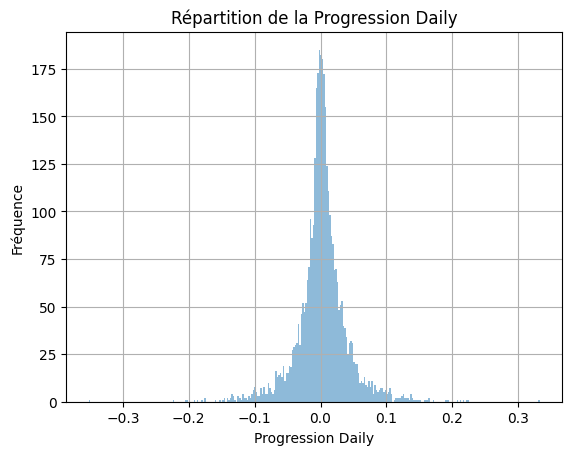

In [155]:
# Affichage de l'histogramme de la progression quotidienne
plt.hist(btc_data['progression daily'].dropna(), bins=300, alpha=0.5)
plt.title('Répartition de la Progression Daily')
plt.xlabel('Progression Daily')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [156]:
print(btc_data['progression daily'].describe())

count    3818.000000
mean        0.002175
std         0.039656
min        -0.351903
25%        -0.013018
50%         0.001511
75%         0.017866
max         0.332556
Name: progression daily, dtype: float64


In [157]:
btc_data_full

,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
time,,,,,,,,
2013-04-28,136.68,127.50,128.00,27503.11,3.662548e+06,134.44,direct,
2013-04-29,149.08,133.00,134.44,70186.33,9.983975e+06,144.00,direct,
2013-04-30,146.93,134.00,144.00,65198.58,9.119201e+06,139.23,direct,
2013-05-01,140.06,104.00,139.23,179988.85,2.178794e+07,116.38,direct,
2013-05-02,126.90,91.11,116.38,234129.17,2.493210e+07,106.25,direct,
...,...,...,...,...,...,...,...,...
2023-10-09,27999.80,27282.89,27933.57,21887.87,6.039641e+08,27598.77,direct,
2023-10-10,27735.72,27298.50,27598.77,18600.95,5.111095e+08,27395.40,direct,
2023-10-11,27475.69,26531.55,27395.40,30496.51,8.213956e+08,26871.21,direct,


In [158]:
# Fusionner les deux DataFrames sur l'index (qui est le timestamp dans ce cas)
merged_data = pd.merge(btc_data, btc_data_full[['volumeto']], left_index=True, right_index=True, how='left')

In [159]:
btc_data = merged_data.drop(labels = "volume", axis = 1)

In [160]:
btc_data

,price,market_cap,progression daily,progression tomorrow,volumeto
2013-04-28,135.300000,1.500518e+09,NaN,0.049224,3.662548e+06
2013-04-29,141.960000,1.575032e+09,0.049224,-0.046915,9.983975e+06
2013-04-30,135.300000,1.501657e+09,-0.046915,-0.135255,9.119201e+06
2013-05-01,117.000000,1.298952e+09,-0.135255,-0.115983,2.178794e+07
2013-05-02,103.430000,1.148668e+09,-0.115983,-0.120081,2.493210e+07
...,...,...,...,...,...
2023-10-09,27948.103652,5.449897e+11,-0.001052,-0.012678,6.039641e+08
2023-10-10,27593.782534,5.382827e+11,-0.012678,-0.007304,5.111095e+08
2023-10-11,27392.247703,5.352004e+11,-0.007304,-0.020081,8.213956e+08
2023-10-12,26842.190439,5.236564e+11,-0.020081,-0.004212,4.385320e+08


In [161]:
#supprimer la première ligne (NaN)
btc_data = btc_data.drop(btc_data.index[0])

In [119]:
"""#supprimer la première ligne (à prédire)
btc_data = btc_data.drop(btc_data.index[-1])"""

In [168]:
missing_values_sum = btc_data.isna().sum()

In [170]:
missing_values_sum

price                   0
market_cap              1
progression daily       0
progression tomorrow    0
volumeto                0
target                  0
dtype: int64

In [175]:
btc_data.loc[btc_data['market_cap'].isna()]

,price,market_cap,progression daily,progression tomorrow,volumeto,target


In [173]:
missing_index = btc_data.loc[btc_data['market_cap'].isna()].index[0]

# Obtenir la position de l'index manquant
missing_pos = btc_data.index.get_loc(missing_index)

# Définir les positions de début et de fin pour l'extraction des données
start_pos = max(0, missing_pos - 3)
end_pos = min(len(btc_data), missing_pos + 4)

# Afficher les 3 lignes avant et après la valeur manquante
subset_btc_data = btc_data.iloc[start_pos:end_pos]
print(subset_btc_data)

                  price    market_cap  progression daily  \
2017-03-30  1031.492906  1.675784e+10          -0.006859   
2017-03-31  1078.274711  1.751958e+10           0.045353   
2017-04-01  1085.253000  1.763483e+10           0.006472   
2017-04-02  1098.068000           NaN           0.011808   
2017-04-03  1139.308275  1.851790e+10           0.037557   
2017-04-04  1140.497590  1.853906e+10           0.001044   
2017-04-05  1132.339905  1.840873e+10          -0.007153   

            progression tomorrow      volumeto  target  
2017-03-30              0.045353  7.763388e+07       1  
2017-03-31              0.006472  9.654392e+07       1  
2017-04-01              0.011808  5.502008e+07       1  
2017-04-02              0.037557  7.785393e+07       1  
2017-04-03              0.001044  1.118708e+08       1  
2017-04-04             -0.007153  8.116409e+07       0  
2017-04-05              0.054640  7.833557e+07       1  


In [174]:
# Trouver l'index de la valeur manquante
missing_index = btc_data.loc[btc_data['market_cap'].isna()].index[0]

# Obtenir la position de l'index manquant
missing_pos = btc_data.index.get_loc(missing_index)

# Calculer la moyenne des valeurs de 'market_cap' qui entourent la valeur manquante
mean_value = (btc_data['market_cap'].iloc[missing_pos - 1] + btc_data['market_cap'].iloc[missing_pos + 1]) / 2

# Remplacer la valeur manquante par la moyenne calculée
btc_data['market_cap'].iloc[missing_pos] = mean_value

In [177]:
btc_data

,price,market_cap,progression daily,progression tomorrow,volumeto,target
2013-04-29,141.960000,1.575032e+09,0.049224,-0.046915,9.983975e+06,0
2013-04-30,135.300000,1.501657e+09,-0.046915,-0.135255,9.119201e+06,0
2013-05-01,117.000000,1.298952e+09,-0.135255,-0.115983,2.178794e+07,0
2013-05-02,103.430000,1.148668e+09,-0.115983,-0.120081,2.493210e+07,0
2013-05-03,91.010000,1.011066e+09,-0.120081,0.222393,2.249626e+07,1
...,...,...,...,...,...,...
2023-10-09,27948.103652,5.449897e+11,-0.001052,-0.012678,6.039641e+08,0
2023-10-10,27593.782534,5.382827e+11,-0.012678,-0.007304,5.111095e+08,0
2023-10-11,27392.247703,5.352004e+11,-0.007304,-0.020081,8.213956e+08,0
2023-10-12,26842.190439,5.236564e+11,-0.020081,-0.004212,4.385320e+08,0


In [176]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Créer une variable cible binaire : 1 si la progression demain est positive, 0 sinon
btc_data['target'] = np.where(btc_data['progression tomorrow'] > 0, 1, 0)

# Sélectionner les caractéristiques
features = btc_data.drop(columns=['progression tomorrow', 'target', 'price'])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(features, btc_data['target'], shuffle=False)

# Entraîner un modèle
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Évaluer le modèle
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

Model Accuracy: 50.05%


In [179]:
btc_data.to_csv('data/btc_data')